In [38]:
import pandas as pd 
import os
import numpy as np 

In [39]:
main_path='/mnt/c/Users/rajes/Desktop/ketosis_project/files'


In [40]:
sensor_values= os.listdir('/mnt/c/Users/rajes/Desktop/ketosis_project/files')[:5]

In [41]:
list_df=[]
for path in sensor_values:
    temp=pd.read_csv(os.path.join(main_path, path))
    temp['date']=  path.split('.')[0]
    temp['date']= pd.to_datetime(temp['date'], format="%m_%d_%Y")
    list_df.append(temp)
sensor_df= pd.concat(list_df)

In [42]:
cohort1_dates = pd.to_datetime([
    '01-03-2025', '01-11-2025', '01-17-2025',
     '12-20-2024','12-27-2024' 
], format='%m-%d-%Y')

# Assign cohort
sensor_df['cohort'] = sensor_df['date'].apply(
    lambda x: 1 if x in cohort1_dates else 2
)
dict_dates_cohort_1= {value: i for i, value in enumerate(cohort1_dates)}

sensor_df['day'] = np.where(
    sensor_df['cohort'] == 1,
    sensor_df['date'].map(dict_dates_cohort_1),
    np.nan
)

sensor_df['date'] = np.where(sensor_df['date'] == pd.Timestamp('2025-02-20'),
                             pd.Timestamp('2025-02-21'),
                             sensor_df['date'])

cohort2_dates= pd.to_datetime([
'2025-01-24',
 '2025-01-31', '2025-02-07', '2025-02-14',
 '2025-02-21'
], format='%Y-%m-%d')

dict_dates_cohort_2= { value:i for i, value in enumerate(cohort2_dates)}

sensor_df['day']= np.where(

    sensor_df['cohort']==2,
    sensor_df['date'].map(dict_dates_cohort_2),
    np.nan
)

### extracting the serum work

In [43]:
serum_report=pd.read_csv(os.path.join(main_path, os.listdir(main_path)[-1]))

In [44]:
serum_report['date']= pd.to_datetime(serum_report['DATE'])

In [45]:
sensor_df['sensor_values'] = sensor_df['sensor_values'].fillna(sensor_df['sensor values'])


In [46]:
sensor_df['date']= pd.to_datetime(sensor_df['date'])

In [47]:
merged_df = sensor_df.merge(
    serum_report,
    left_on=['date', 'cowid'],
    right_on=['date', 'COWID'],
    how='inner'
)


In [48]:
milk_df= pd.read_csv(os.path.join(main_path, 'DHI MILK(Sheet1).csv'))

In [49]:
milk_df.columns

Index(['DATE', 'COHORT', 'PEN', 'TREATMENT', 'COWID', 'DAY', 'Fat', 'Protein',
       'Lactose', 'SNF', 'MUN', 'SCC', 'BHB', 'Acetone', 'Unnamed: 14',
       'Unnamed: 15', 'sick ', 'Check', 'no data '],
      dtype='object')

In [50]:
milk_df['date']= pd.to_datetime(milk_df['DATE'])

In [51]:
milk_df['cowid'] = milk_df['COWID'].astype(str).str.split(' ').str[0].astype('int64')


In [52]:
merged_milk_df= merged_df.merge(
    milk_df,
    left_on=['date', 'cowid'],
    right_on=['date', 'cowid'],
    how='inner'

)

In [53]:
merged_milk_df

,cowid,sensor_values,date,sensor values,cohort,day,DATE_x,COHORT_x,PEN_x,TREATMENT_x,...,SNF,MUN,SCC,BHB,Acetone,Unnamed: 14,Unnamed: 15,sick,Check,no data
0,4877,7.65,2025-01-31,NaN,2,NaN,1/31/2025,2,6,TREATMENT,...,8.50,6.40361,43,0.96,0.00,NaN,NaN,NaN,NaN,NaN
1,7623,2.35,2025-01-31,NaN,2,NaN,1/31/2025,2,6,TREATMENT,...,8.87,6.33637,210,1.23,0.03,NaN,NaN,NaN,NaN,NaN
2,9669,7.84,2025-01-31,NaN,2,NaN,1/31/2025,2,6,TREATMENT,...,8.08,4.34631,4053,1.31,0.02,NaN,NaN,NaN,NaN,NaN
3,9795,6.58,2025-01-31,NaN,2,NaN,1/31/2025,2,2,CONTROL,...,8.10,2.49333,6463,0.51,0.00,NaN,NaN,NaN,NaN,NaN
4,9828,4.67,2025-01-31,NaN,2,NaN,1/31/2025,2,6,TREATMENT,...,9.01,9.03482,46,0.63,0.05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10056,5.02,2025-02-07,NaN,2,NaN,2/7/2025,2,5,TREATMENT,...,9.31,3.37343,37,0.94,0.06,NaN,NaN,NaN,NaN,NaN
111,10085,0.73,2025-02-07,NaN,2,NaN,2/7/2025,2,5,TREATMENT,...,9.92,14.12919,1101,1.42,0.17,NaN,NaN,NaN,NaN,NaN
112,10086,3.70,2025-02-07,NaN,2,NaN,2/7/2025,2,5,TREATMENT,...,8.60,6.79028,245,1.22,0.04,NaN,NaN,NaN,NaN,NaN
113,50013,2.65,2025-02-07,NaN,2,NaN,2/7/2025,2,5,TREATMENT,...,8.72,6.93888,160,1.37,0.06,NaN,NaN,NaN,NaN,NaN


In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
merged_milk_df['sensor_values_scaled']= merged_milk_df.groupby('date')['sensor_values'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())

In [55]:
merged_milk_df['BHB_scaled']= merged_milk_df.groupby('date')['BHB'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())

In [56]:
merged_milk_df['Acetone_scaled']= merged_milk_df.groupby('date')['Acetone'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())

In [57]:
merged_milk_df[['BHB', 'sensor_values']].corr()

,BHB,sensor_values
BHB,1.000000,0.378146
sensor_values,0.378146,1.000000


In [58]:
import statsmodels.formula.api as smf

# Mixed effects model
# Assuming 'BHB' is the outcome and 'sensor_values' is predictor
model = smf.mixedlm("BHB ~ sensor_values",
                    merged_milk_df,
                    groups=merged_milk_df["cowid"])
result = model.fit()

print(result.summary())


         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: BHB     
No. Observations:  115     Method:             REML    
No. Groups:        57      Scale:              0.0990  
Min. group size:   1       Log-Likelihood:     -68.0100
Max. group size:   5       Converged:          Yes     
Mean group size:   2.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.062    0.056 19.054 0.000  0.953  1.172
sensor_values 0.008    0.003  3.021 0.003  0.003  0.014
Group Var     0.111    0.140                           



In [59]:
import numpy as np

# Fit model
model = smf.mixedlm("BHB ~ sensor_values",
                    merged_milk_df,
                    groups=merged_milk_df["cowid"])
result = model.fit()

# Predicted values
merged_milk_df["fitted"] = result.fittedvalues

# Residuals
merged_milk_df["resid"] = merged_milk_df["BHB"] - merged_milk_df["fitted"]

# Pseudo R-squared
r2 = np.corrcoef(merged_milk_df["BHB"], merged_milk_df["fitted"])[0,1]**2

print("Pseudo R²:", r2)
print(result.summary())



Pseudo R²: 0.7587880128495722
         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: BHB     
No. Observations:  115     Method:             REML    
No. Groups:        57      Scale:              0.0990  
Min. group size:   1       Log-Likelihood:     -68.0100
Max. group size:   5       Converged:          Yes     
Mean group size:   2.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.062    0.056 19.054 0.000  0.953  1.172
sensor_values 0.008    0.003  3.021 0.003  0.003  0.014
Group Var     0.111    0.140                           



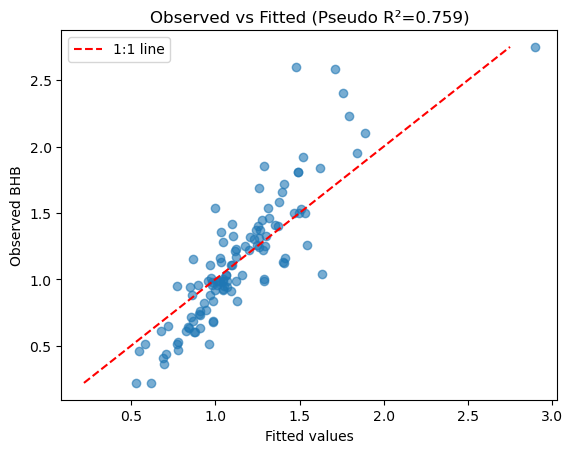

In [61]:
import matplotlib.pyplot as plt

plt.scatter(merged_milk_df["fitted"], merged_milk_df["BHB"], alpha=0.6)
plt.plot([merged_milk_df["BHB"].min(), merged_milk_df["BHB"].max()],
         [merged_milk_df["BHB"].min(), merged_milk_df["BHB"].max()],
         'r--', label="1:1 line")
plt.xlabel("Fitted values")
plt.ylabel("Observed BHB")
plt.legend()
plt.title(f"Observed vs Fitted (Pseudo R²={r2:.3f})")
plt.show()


In [62]:
# Mixed effects model for Acetone
model_acetone = smf.mixedlm("Acetone ~ sensor_values",
                            merged_milk_df,
                            groups=merged_milk_df["cowid"])
result_acetone = model_acetone.fit()

# Predicted values
merged_milk_df["fitted_acetone"] = result_acetone.fittedvalues

# Residuals
merged_milk_df["resid_acetone"] = merged_milk_df["Acetone"] - merged_milk_df["fitted_acetone"]

# Pseudo R-squared
r2_acetone = np.corrcoef(merged_milk_df["Acetone"], merged_milk_df["fitted_acetone"])[0,1]**2

print("Pseudo R² (Acetone):", r2_acetone)
print(result_acetone.summary())


Pseudo R² (Acetone): 0.6643590025625093
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Acetone 
No. Observations: 115     Method:             REML    
No. Groups:       57      Scale:              0.0008  
Min. group size:  1       Log-Likelihood:     212.4658
Max. group size:  5       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.025    0.004 5.867 0.000  0.017  0.034
sensor_values 0.000    0.000 2.112 0.035  0.000  0.001
Group Var     0.001    0.008                          



/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


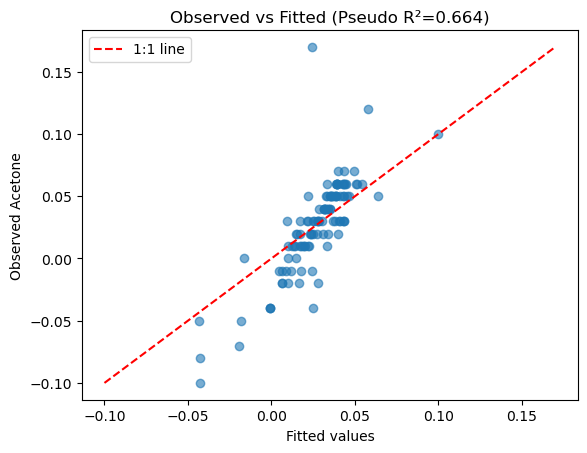

In [63]:
plt.scatter(merged_milk_df["fitted_acetone"], merged_milk_df["Acetone"], alpha=0.6)
plt.plot([merged_milk_df["Acetone"].min(), merged_milk_df["Acetone"].max()],
         [merged_milk_df["Acetone"].min(), merged_milk_df["Acetone"].max()],
         'r--', label="1:1 line")
plt.xlabel("Fitted values")
plt.ylabel("Observed Acetone")
plt.legend()
plt.title(f"Observed vs Fitted (Pseudo R²={r2_acetone:.3f})")
plt.show()


In [68]:
merged_milk_df['nefa']=merged_milk_df['NEFA (meEq/L)'] 

In [69]:
# Mixed effects model for NEFA
model_nefa = smf.mixedlm("nefa ~ sensor_values",
                         merged_milk_df,
                         groups=merged_milk_df["cowid"])
result_nefa = model_nefa.fit()

# Predicted values
merged_milk_df["fitted_nefa"] = result_nefa.fittedvalues

# Residuals
merged_milk_df["resid_nefa"] = merged_milk_df["nefa"] - merged_milk_df["fitted_nefa"]

# Pseudo R-squared
r2_nefa = np.corrcoef(merged_milk_df["nefa"], merged_milk_df["fitted_nefa"])[0,1]**2

print("Pseudo R² (NEFA):", r2_nefa)
print(result_nefa.summary())


Pseudo R² (NEFA): 0.008372659493067706
         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: nefa    
No. Observations:  115     Method:             REML    
No. Groups:        57      Scale:              0.0064  
Min. group size:   1       Log-Likelihood:     117.5564
Max. group size:   5       Converged:          Yes     
Mean group size:   2.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.133    0.008 16.573 0.000  0.118  0.149
sensor_values 0.001    0.001  0.973 0.330 -0.001  0.002
Group Var     0.000    0.008                           



/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


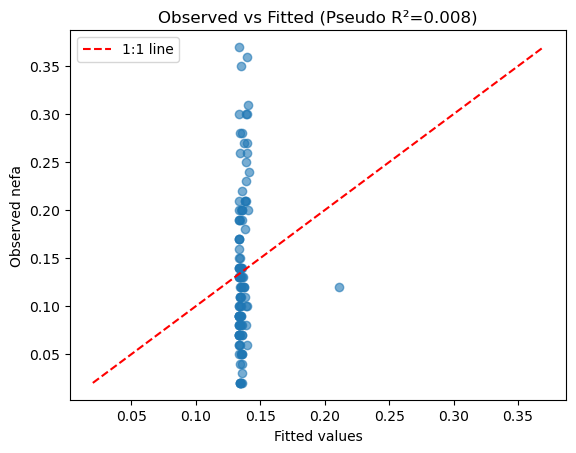

In [70]:
plt.scatter(merged_milk_df["fitted_nefa"], merged_milk_df["nefa"], alpha=0.6)
plt.plot([merged_milk_df["nefa"].min(), merged_milk_df["nefa"].max()],
         [merged_milk_df["nefa"].min(), merged_milk_df["nefa"].max()],
         'r--', label="1:1 line")
plt.xlabel("Fitted values")
plt.ylabel("Observed nefa")
plt.legend()
plt.title(f"Observed vs Fitted (Pseudo R²={r2_nefa:.3f})")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


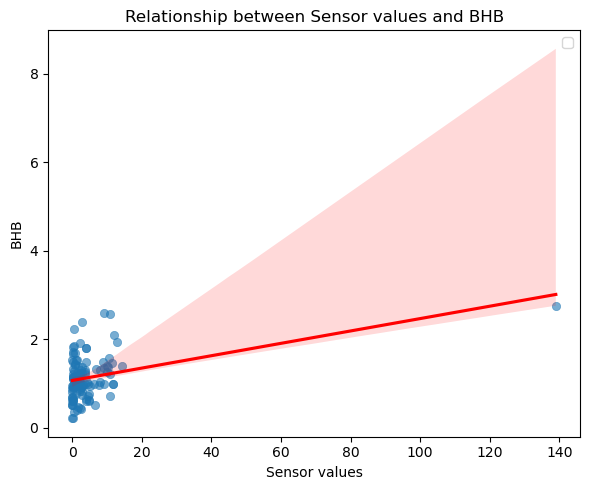

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit mixed model
model = smf.mixedlm("BHB ~ sensor_values", merged_milk_df, groups=merged_milk_df["cowid"])
result = model.fit()

# Extract p-value for sensor_values
pval = result.pvalues["sensor_values"]

# Scatter plot + regression line
plt.figure(figsize=(6,5))
sns.scatterplot(x="sensor_values", y="BHB", data=merged_milk_df, alpha=0.6, edgecolor=None)
sns.regplot(x="sensor_values", y="BHB", data=merged_milk_df,
            scatter=False, color="red", line_kws={"label":f"p = {pval:.3e}"})

# Labels and title
plt.xlabel("Sensor values")
plt.ylabel("BHB")
plt.legend()
plt.title("Relationship between Sensor values and BHB")
plt.tight_layout()
plt.show()


In [73]:
result.pvalues["sensor_values"]

0.002518785108644418

In [75]:
from scipy.stats import zscore

# Compute z-scores for sensor_values
merged_milk_df["sensor_z"] = zscore(merged_milk_df["sensor_values"], nan_policy='omit')

# Filter out rows with |z| > 3 (common cutoff, you can adjust)
filtered_df = merged_milk_df[merged_milk_df["sensor_z"].abs() <= 3].copy()

print("Original size:", merged_milk_df.shape[0])
print("Filtered size:", filtered_df.shape[0])

# Fit mixed model on filtered data
model = smf.mixedlm("BHB ~ sensor_values",
                    filtered_df,
                    groups=filtered_df["cowid"])
result = model.fit()

print(result.summary())


Original size: 115
Filtered size: 114
         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: BHB     
No. Observations:  114     Method:             REML    
No. Groups:        57      Scale:              0.0992  
Min. group size:   1       Log-Likelihood:     -64.9035
Max. group size:   5       Converged:          Yes     
Mean group size:   2.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.006    0.061 16.393 0.000  0.886  1.126
sensor_values 0.026    0.010  2.736 0.006  0.007  0.045
Group Var     0.102    0.131                           



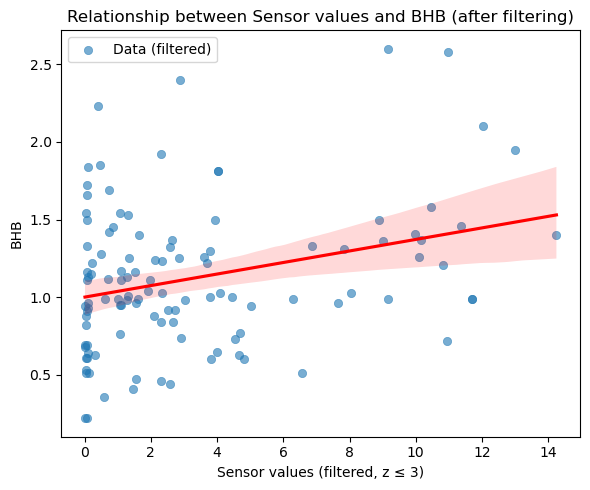

In [78]:
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# --- Z-score filtering ---
merged_milk_df["sensor_z"] = zscore(merged_milk_df["sensor_values"], nan_policy='omit')
filtered_df = merged_milk_df[merged_milk_df["sensor_z"].abs() <= 1].copy()

# --- Mixed model fit ---
model = smf.mixedlm("BHB ~ sensor_values",
                    filtered_df,
                    groups=filtered_df["cowid"])
result = model.fit()

# Extract p-value for fixed effect
pval = result.pvalues["sensor_values"]

# --- Plot ---
plt.figure(figsize=(6,5))
sns.scatterplot(x="sensor_values", y="BHB", data=filtered_df,
                alpha=0.6, edgecolor=None, label="Data (filtered)")
sns.regplot(x="sensor_values", y="BHB", data=filtered_df,
            scatter=False, color="red",
            line_kws={"label": f"p = {pval:.3e}"})

plt.xlabel("Sensor values (filtered, z ≤ 3)")
plt.ylabel("BHB")
plt.title("Relationship between Sensor values and BHB (after filtering)")
plt.legend()
plt.tight_layout()
plt.show()


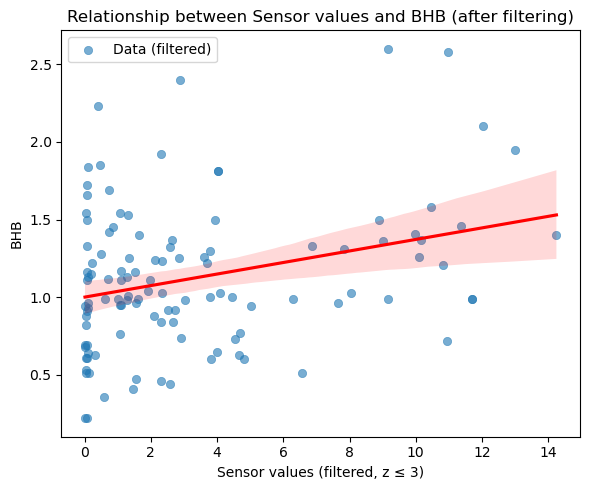

In [80]:
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# --- Z-score filtering ---
merged_milk_df["sensor_z"] = zscore(merged_milk_df["sensor_values"], nan_policy='omit')
filtered_df = merged_milk_df[merged_milk_df["sensor_z"].abs() <= 3].copy()

# --- Mixed model fit ---
model = smf.mixedlm("BHB ~ sensor_values",
                    filtered_df,
                    groups=filtered_df["cowid"])
result = model.fit()

# Extract p-value for fixed effect
pval = result.pvalues["sensor_values"]

# --- Plot ---
plt.figure(figsize=(6,5))
sns.scatterplot(x="sensor_values", y="BHB", data=filtered_df,
                alpha=0.6, edgecolor=None, label="Data (filtered)")
sns.regplot(x="sensor_values", y="BHB", data=filtered_df,
            scatter=False, color="red",
            line_kws={"label": f"p = {pval:.3e}"})

plt.xlabel("Sensor values (filtered, z ≤ 3)")
plt.ylabel("BHB")
plt.title("Relationship between Sensor values and BHB (after filtering)")
plt.legend()
plt.tight_layout()
plt.show()


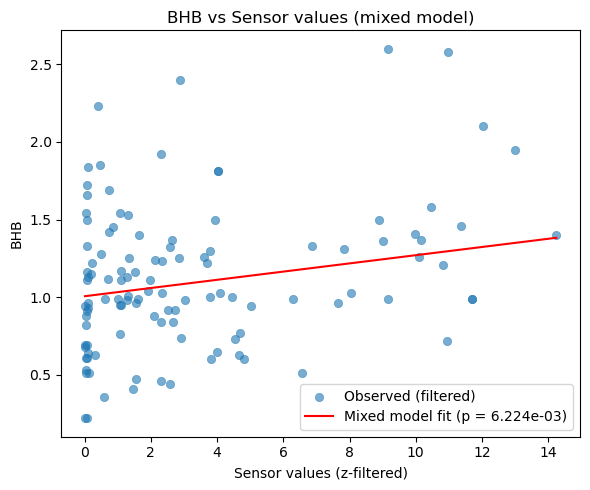

/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


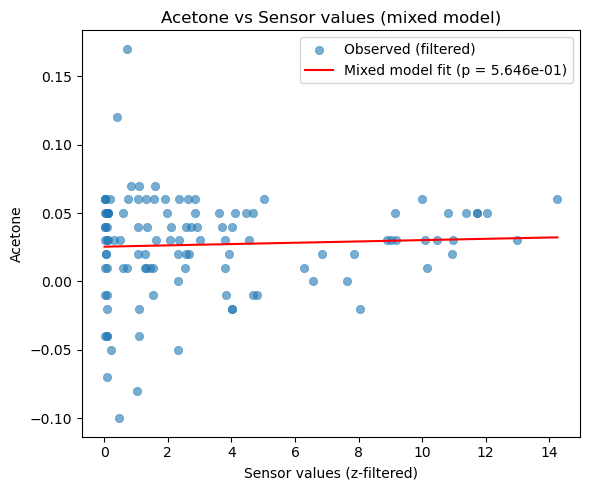

/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


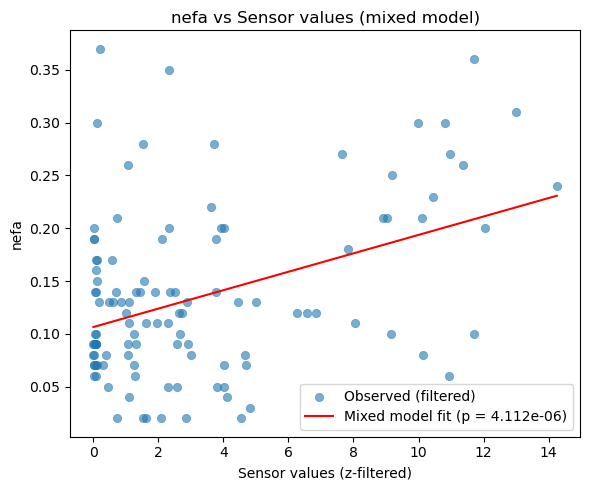

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import zscore

def plot_mixed_model(df, response, predictor="sensor_values", group="cowid", z_thresh=3):
    """
    Fit mixed model with random intercept, filter predictor by z-score,
    and plot observed vs fitted line from model fixed effects.
    """
    # Z-score filter
    df = df.copy()
    df["sensor_z"] = zscore(df[predictor], nan_policy="omit")
    filtered_df = df[df["sensor_z"].abs() <= z_thresh].copy()
    
    # Fit mixed model
    model = smf.mixedlm(f"Q('{response}') ~ {predictor}",
                        filtered_df,
                        groups=filtered_df[group])
    result = model.fit()
    
    # Extract p-value
    pval = result.pvalues[predictor]
    
    # Generate prediction grid
    sensor_grid = np.linspace(filtered_df[predictor].min(),
                              filtered_df[predictor].max(), 100)
    pred_fixed = result.predict(exog=dict(sensor_values=sensor_grid))
    
    # --- Plot ---
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=predictor, y=response, data=filtered_df,
                    alpha=0.6, edgecolor=None, label="Observed (filtered)")
    
    plt.plot(sensor_grid, pred_fixed, color="red",
             label=f"Mixed model fit (p = {pval:.3e})")
    
    plt.xlabel("Sensor values (z-filtered)")
    plt.ylabel(response)
    plt.title(f"{response} vs Sensor values (mixed model)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return result

# --- Example usage ---
result_bhb = plot_mixed_model(merged_milk_df, "BHB")
result_acetone = plot_mixed_model(merged_milk_df, "Acetone")
result_nefa = plot_mixed_model(merged_milk_df, "nefa")


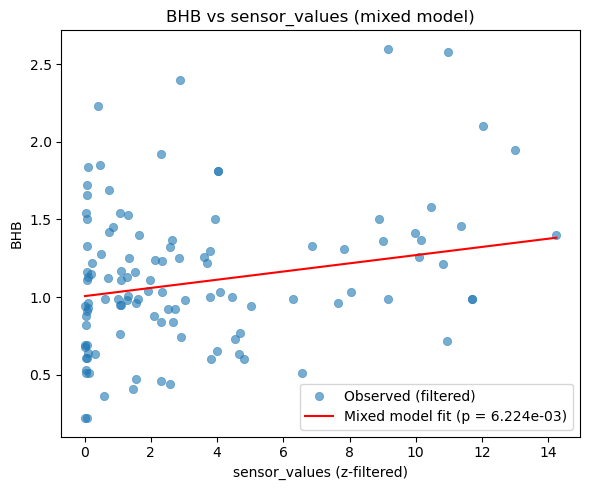

/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


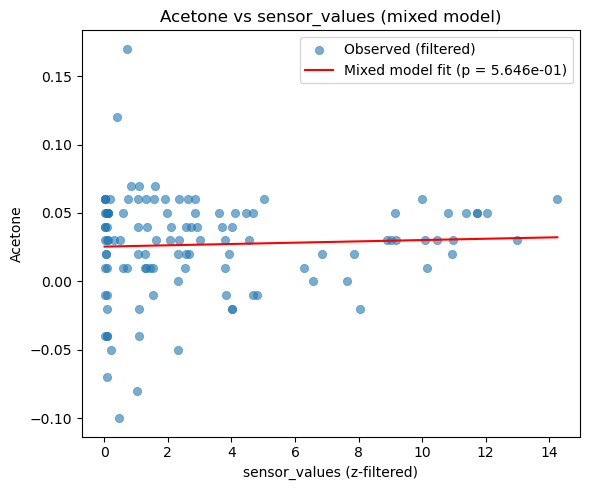

/usr/lib/python3/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


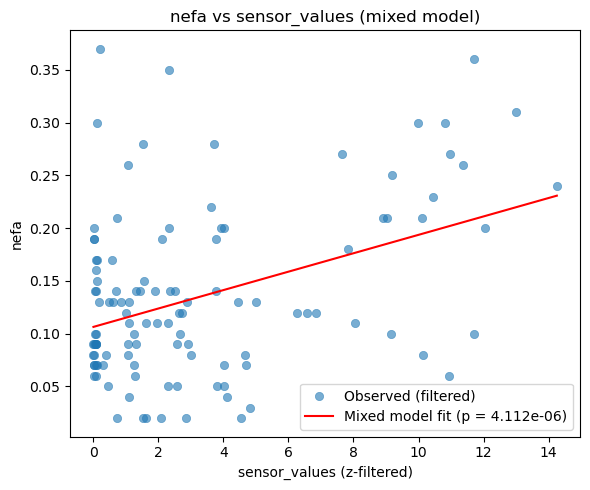

Pseudo R² for BHB: 0.739
Pseudo R² for Acetone: 0.663
Pseudo R² for NEFA: 0.277


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import zscore

def plot_mixed_model_with_r2(df, response, predictor="sensor_values", group="cowid", z_thresh=3):
    """
    Fit mixed model with random intercept, filter predictor by z-score,
    plot observed vs fitted line from model fixed effects, and return pseudo R².
    
    Returns:
        result: fitted mixed model
        r2: pseudo R² (correlation^2 between observed and fitted)
    """
    # Z-score filter
    df = df.copy()
    df["sensor_z"] = zscore(df[predictor], nan_policy="omit")
    filtered_df = df[df["sensor_z"].abs() <= z_thresh].copy()
    
    # Fit mixed model
    model = smf.mixedlm(f"Q('{response}') ~ {predictor}",
                        filtered_df,
                        groups=filtered_df[group])
    result = model.fit()
    
    # Extract p-value
    pval = result.pvalues[predictor]
    
    # Generate prediction grid (fixed effect only)
    sensor_grid = np.linspace(filtered_df[predictor].min(),
                              filtered_df[predictor].max(), 100)
    pred_fixed = result.predict(exog=dict(sensor_values=sensor_grid))
    
    # Calculate pseudo R² using correlation of observed vs fitted
    r2 = np.corrcoef(filtered_df[response], result.fittedvalues)[0,1]**2
    
    # --- Plot ---
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=predictor, y=response, data=filtered_df,
                    alpha=0.6, edgecolor=None, label="Observed (filtered)")
    plt.plot(sensor_grid, pred_fixed, color="red",
             label=f"Mixed model fit (p = {pval:.3e})")
    plt.xlabel(f"{predictor} (z-filtered)")
    plt.ylabel(response)
    plt.title(f"{response} vs {predictor} (mixed model)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return result, r2

# --- Example usage ---
result_bhb, r2_bhb = plot_mixed_model_with_r2(merged_milk_df, "BHB")
result_acetone, r2_acetone = plot_mixed_model_with_r2(merged_milk_df, "Acetone")
result_nefa, r2_nefa = plot_mixed_model_with_r2(merged_milk_df, "nefa")

print(f"Pseudo R² for BHB: {r2_bhb:.3f}")
print(f"Pseudo R² for Acetone: {r2_acetone:.3f}")
print(f"Pseudo R² for NEFA: {r2_nefa:.3f}")


In [86]:
merged_milk_df['sensor_values_square']= merged_milk_df['sensor_values']**2

In [89]:
merged_milk_df[['sensor_values_square', 'sensor_values']]

,sensor_values_square,sensor_values
0,58.5225,7.65
1,5.5225,2.35
2,61.4656,7.84
3,43.2964,6.58
4,21.8089,4.67
...,...,...
110,25.2004,5.02
111,0.5329,0.73
112,13.6900,3.70
113,7.0225,2.65
